### Lab 6

In [1]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
F = 7
L = 8

N = (L+F)*100

In [13]:
sim1 = CmdStanModel(stan_file="code_1.stan")
samples = sim1.sample(data={'N':N},
                        seed=20042023,
                        fixed_param=True,
                        iter_sampling=1, 
                        iter_warmup=1,
                        chains=1)

sim1_df  = samples.draws_pd()
sim1_df .describe()

20:20:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:20:08 - cmdstanpy - INFO - CmdStan done processing.


,chain__,iter__,draw__,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
count,1.0,1.0,1.0,1.0,1.0,1.00,1.000000,1.00000,1.00000,1.0000,...,1.00000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
mean,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218
25%,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218
50%,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218
75%,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218
max,1.0,1.0,1.0,0.0,0.0,0.01,0.193042,-2.08066,-1.06712,-2.0951,...,-1.69368,1.9443,0.861397,1.61727,-0.95572,0.193773,-0.333911,0.934195,0.063536,0.587218


In [7]:
sim2 = CmdStanModel(stan_file="code_2.stan")
data2=sim2.sample(data={'N': N}, 
                  seed=25042023, 
                  iter_sampling=1, 
                  iter_warmup=1, 
                  chains=1)

20:18:42 - cmdstanpy - INFO - compiling stan file /workspace/code_2.stan to exe file /workspace/code_2
20:18:51 - cmdstanpy - INFO - compiled model executable: /workspace/code_2
20:18:51 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

20:18:52 - cmdstanpy - INFO - CmdStan done processing.


In [8]:
sim2_df = data2.draws_pd()
sim2_df.head()

,chain__,iter__,draw__,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,...,y[1491],y[1492],y[1493],y[1494],y[1495],y[1496],y[1497],y[1498],y[1499],y[1500]
0,1.0,1.0,1.0,0.0,1.0,14.3855,1.0,1.0,0.0,0.0,...,-4.72711,3.51503,-3.16176,3.52161,3.65202,3.39739,-3.94083,-7.01419,-1.66793,-1.29729


In [9]:
sim3 = CmdStanModel(stan_file="code_3.stan")

20:19:00 - cmdstanpy - INFO - compiling stan file /workspace/code_3.stan to exe file /workspace/code_3
20:19:10 - cmdstanpy - INFO - compiled model executable: /workspace/code_3


In [10]:
sim4 = CmdStanModel(stan_file="code_4.stan")

20:19:10 - cmdstanpy - INFO - compiling stan file /workspace/code_4.stan to exe file /workspace/code_4
20:19:20 - cmdstanpy - INFO - compiled model executable: /workspace/code_4


In [14]:
data_fit = {"N": N, 
            "y": sim1_df.loc[:, 'y[1]':f'y[{N}]'].values.reshape((N,))}
fit1_for_sim1 = sim3.sample(data=data_fit, 
                           seed=25042023)

20:20:11 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

20:20:12 - cmdstanpy - INFO - CmdStan done processing.
20:20:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code_3.stan', line 13, column 4 to column 36)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code_3.stan', line 13, column 4 to column 36)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in 'code_3.stan', line 13, column 4 to column 36)
Consider re-running with show_console=True if the above output is unclear!


In [15]:
fit2_for_sim1 = sim4.sample(data=data_fit, seed=25042023)

20:20:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

20:20:17 - cmdstanpy - INFO - CmdStan done processing.
20:20:17 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code_4.stan', line 14, column 4 to column 33)
	Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in 'code_4.stan', line 15, column 4 to column 42)
Exception: gamma_lpdf: Random variable is inf, but must be positive finite! (in 'code_4.stan', line 14, column 4 to column 33)
	Exception: student_t_lpdf: Scale parameter is 0, but must be positive finite! (in 'code_4.stan', line 15, column 4 to column 42)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'code_4.stan', line 14, column 4 to column 33)
	Exception: student_t_lpdf: Scale parameter is inf, but must be positive finite! (in 'code_4.stan', line 15, column 4 to column 42)
Exception: gamma_lpdf: Random variable is 0, but must be positive finite! (in 'code_4.stan', line 14, column

In [17]:
fit1_az = az.from_cmdstanpy(posterior=fit1_for_sim1)
fit2_az = az.from_cmdstanpy(posterior=fit2_for_sim1)

In [18]:
fit1_az

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats

In [19]:
model_dict = {"Normal model": fit1_az, "Student model": fit2_az}
model_comparison = az.compare(model_dict, 
                              ic="loo", 
                              scale="deviance")
print(model_comparison)

/usr/local/lib/python3.11/site-packages/arviz/stats/stats.py:797: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


               rank     elpd_loo      p_loo    elpd_diff  weight          se  \
Student model     0  4679.166180   5.022306     0.000000     1.0   85.696570   
Normal model      1  5870.324026  45.330021  1191.157846     0.0  403.272977   

                      dse  warning     scale  
Student model    0.000000    False  deviance  
Normal model   346.115651     True  deviance  


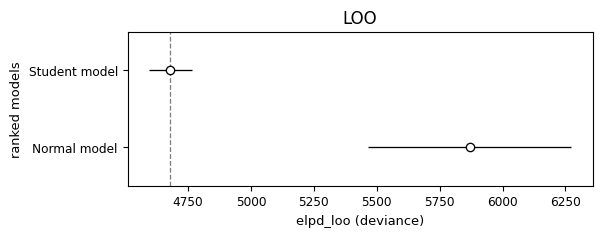

In [20]:
az.plot_compare(model_comparison)
plt.title('LOO')
plt.show()